# Visualización de los datos (imágenes NIfTI)

Además de la evaluación cuantitativa de los resultados es importante tener presente también el análisis cualitativo. Es por ello que en este cuaderno se presentan 3 formas de visualizar archivos de MRI en formato NIfTI. Como ejemplo se han utilizado imágenes del dataset ATLAS v2.0. Primero se muestra una visión de los 3 planos de una imagen ATLAS sin procesar, después una comparación entre las imágenes HR, LR y superresueltas originadas durante el proyecto y por último un método para poder apreciar la imagen superresuelta en todas las slices de un plano.

## 1. Visualizar los 3 planos de la MRI 

In [1]:
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#Cargo mi imagen NIfTI
t11_img = nib.load('/home/veronicabp/Dataset/ATLAS_2/P9/imagenes/T1w/sub-r001s023_ses-1_space-MNI152NLin2009aSym_T1w.nii.gz')

In [3]:
t11_data = t11_img.get_fdata()
t11_data.shape

(197, 233, 189)

In [4]:
t11_img.get_fdata().shape

(197, 233, 189)

In [5]:
#Valores mínimo y máximo de la intensidad de las imágenes
print(np.min(t11_data))
print(np.max(t11_data))

0.0
150.5087432861328


### Slicing data

In [6]:
#88th slice in the x axis
x_slice = t11_data[98, :, :]

#128th slice from the y and z axis
y_slice = t11_data[:,116,:]
z_slice = t11_data[:,:,94]


### Visualizing data

<Figure size 1080x360 with 0 Axes>

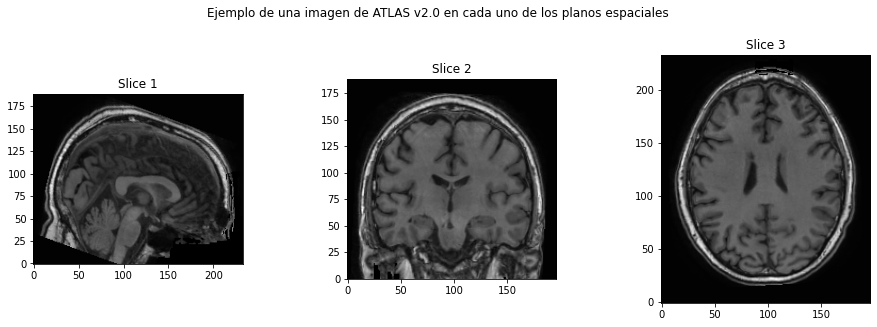

In [7]:
%matplotlib inline

# Cojo tres slices de la MRI como si fuesen 3 imágenes distintas
slices = [x_slice, y_slice, z_slice]

# Aumenta el tamaño de la figura
plt.figure(figsize=(15, 5)) 

# Crea subplots con espacio entre ellos
fig, axes = plt.subplots(1, len(slices), figsize=(15, 5))  
plt.subplots_adjust(wspace=0.5)  

# Dibuja cada imagen en su propio subplot
for i, slice in enumerate(slices):
    axes[i].imshow(slice.T, cmap="gray", origin="lower")
    axes[i].set_title(f"Slice {i + 1}")

# Añade un título general a la figura si lo deseas
plt.suptitle("Ejemplo de una imagen de ATLAS v2.0 en cada uno de los planos espaciales")

# Muestra la figura
plt.show()


## 2. Comparar la visualización de imágenes de carpetas diferentes

Forma de la imagen 1 sub-r001s023_ses-1_space-MNI152NLin2009aSym_T1w_HR.nii.gz: (206, 244, 198)
Valor mínimo de la imagen 1: 0.0
Valor máximo de la imagen 1: 1.0
Forma de la imagen 2 sub-r001s023_ses-1_space-MNI152NLin2009aSym_T1w_LR.nii.gz: (103, 122, 99)
Valor mínimo de la imagen 2: 0.009959502498868145
Valor máximo de la imagen 2: 0.9302238699492965
Forma de la imagen 3 SR_patch_128_step_64.nii.gz: (206, 244, 198)
Valor mínimo de la imagen 3: 0.009959502145648003
Valor máximo de la imagen 3: 0.941396176815033


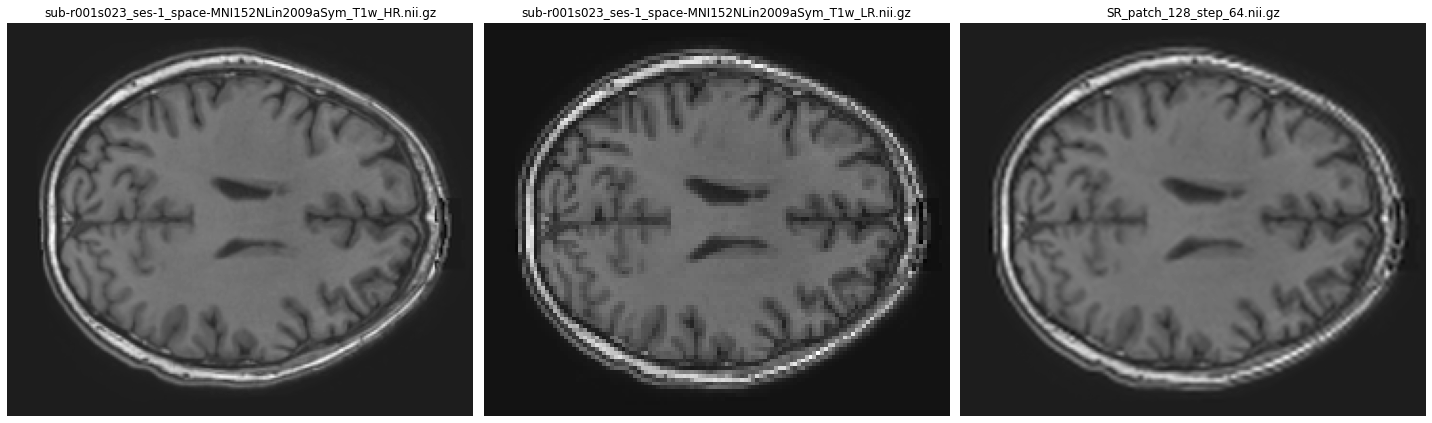

In [8]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# Rutas de los archivos NIfTI
#archivo HR ground truth
img_path1 = '/home/veronicabp/Dataset/ATLAS_2/P9/imagenes/img_HR/T1w_HR/sub-r001s023_ses-1_space-MNI152NLin2009aSym_T1w_HR.nii.gz'
img_path2 = '/home/veronicabp/Dataset/ATLAS_2/P9/imagenes/img_LR/T1w_LR/sub-r001s023_ses-1_space-MNI152NLin2009aSym_T1w/sub-r001s023_ses-1_space-MNI152NLin2009aSym_T1w_LR.nii.gz'
img_path3 = '/home/veronicabp/Dataset/ATLAS_2/P9/imagenes/img_LR/T1w_LR/sub-r001s023_ses-1_space-MNI152NLin2009aSym_T1w/Result_with_weights_epoch215/patch_128_step_64/SR_patch_128_step_64.nii.gz'


# Cargar imágenes de esas rutas
nii_img1 = nib.load(img_path1)
nii_img2 = nib.load(img_path2)
nii_img3 = nib.load(img_path3)

img_data1 = nii_img1.get_fdata()
img_data2 = nii_img2.get_fdata()
img_data3 = nii_img3.get_fdata()

# Crear una matriz de subplots 1x2 para visualizar las imágenes
fig, axs = plt.subplots(1, 3, figsize=(20, 8))

# Cargar la imagen 1
axs[0].imshow(img_data1[:, :, 99], cmap='gray')
axs[0].set_title(os.path.basename(img_path1))
axs[0].axis('off')
print(f"Forma de la imagen 1 {os.path.basename(img_path1)}: {img_data1.shape}")
print(f"Valor mínimo de la imagen 1: {np.min(img_data1)}")
print(f"Valor máximo de la imagen 1: {np.max(img_data1)}")

# Cargar la imagen 2
axs[1].imshow(img_data2[:, :, 49], cmap='gray')
axs[1].set_title(os.path.basename(img_path2))
axs[1].axis('off')
print(f"Forma de la imagen 2 {os.path.basename(img_path2)}: {img_data2.shape}")
print(f"Valor mínimo de la imagen 2: {np.min(img_data2)}")
print(f"Valor máximo de la imagen 2: {np.max(img_data2)}")

# Cargar la imagen 3
axs[2].imshow(img_data3[:, :, 99], cmap='gray')
axs[2].set_title(os.path.basename(img_path3))
axs[2].axis('off')
print(f"Forma de la imagen 3 {os.path.basename(img_path3)}: {img_data3.shape}")
print(f"Valor mínimo de la imagen 3: {np.min(img_data3)}")
print(f"Valor máximo de la imagen 3: {np.max(img_data3)}")

plt.tight_layout()
plt.show()


## 3. Visualizar todas las slices de una MRI presionando J o K

In [13]:
%matplotlib notebook

In [14]:
import os
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

image_path='/home/veronicabp/Dataset/ATLAS_2/P9/imagenes/img_LR/T1w_LR/sub-r001s023_ses-1_space-MNI152NLin2009aSym_T1w/Result_with_weights_epoch215/patch_128_step_64/SR_patch_128_step_64.nii.gz'

# Read the image 
struct = nib.load(image_path)

# Get a plain NumPy array, without all the metadata
struct_arr = struct.get_data()
struct_arr2 = struct_arr.T
struct_arr3 = np.transpose(struct_arr, (1, 2, 0)) #pruebo otra forma de hacerlo



/home/veronicabp/.conda/envs/segsrgan/lib/python3.6/site-packages/ipykernel_launcher.py:12: DeprecationWarning: get_data() is deprecated in favor of get_fdata(), which has a more predictable return type. To obtain get_data() behavior going forward, use numpy.asanyarray(img.dataobj).

* deprecated from version: 3.0
* Will raise <class 'nibabel.deprecator.ExpiredDeprecationError'> as of version: 5.0
  if sys.path[0] == '':


In [15]:
def remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)
                
def multi_slice_viewer(volume):
    remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots()
    ax.volume = volume
    ax.index = volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', process_key)

def process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        previous_slice(ax)
    elif event.key == 'k':
        next_slice(ax)
    fig.canvas.draw()

def previous_slice(ax):
    ax.index = (ax.index - 1) % len(ax.volume)
    ax.images[0].set_array(ax.volume[ax.index])

def next_slice(ax):
    ax.index = (ax.index + 1) % len(ax.volume)
    ax.images[0].set_array(ax.volume[ax.index])

<IPython.core.display.Javascript object>


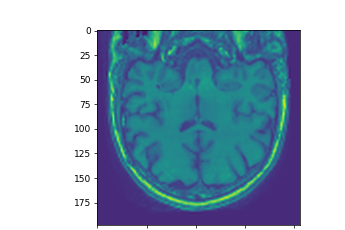

In [16]:
multi_slice_viewer(struct_arr3)